# Cleaning and Pre Processing Sport and Geographic Data

#### Setting up the notebook

Importing required packages

In [12]:
import matplotlib as mpl
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import os
import pandas as pd

Setting seed for reproducibility

In [13]:
np.random.seed(0)

Setting the Working Directory

In [14]:
os.getcwd()

'c:\\Users\\vicks\\OneDrive\\Data Science (not uni)\\Portfolio\\Remastered MA Geo Diss\\Data'

In [15]:
os.chdir("c:\\Users\\vicks\\OneDrive\\Data Science (not uni)\\Portfolio\\Remastered MA Geo Diss\\Data")

Importing the dataset

_Pandas refused to import correctly unless I removed the columns which contained text (these contained country names and would have been removed during the cleaning process anyway)._

In [16]:
SportData = pd.read_csv("Country Anon Data.csv")

In [17]:
SportData.head()

,Overall Jokl Rank,Athletics,Cycling,Gymnastics,Shooting,Swimming,Coastline (Km) (2018),Temperature (1901-2016 [C]),GDP (US Billion Dollar),Elevation (Feet),Status of Women,Democracy Index,Population
0,3592.91,1444.87,255.14,573.98,330.12,988.81,19924.0,7.00,21428.0,611.53,0.85,7.96,331002651
1,2202.10,729.75,413.69,503.35,119.66,435.66,12429.0,8.50,2827.0,526.59,0.88,8.52,67886011
2,1906.08,222.45,11.54,479.91,687.05,505.14,14500.0,6.39,14343.0,6005.63,0.73,2.26,1439323776
3,1828.25,288.53,413.02,205.08,484.06,437.56,7600.0,11.86,2001.0,1754.73,0.83,7.52,60461826
4,1506.77,549.62,190.79,318.79,3.87,443.69,202080.0,-6.89,1736.0,1519.09,0.88,9.22,37742154


Checking for missing values and testing what proportion of the data is missing

In [18]:
missing_values_count = SportData.isnull().sum()
total_cells = np.product(SportData.shape)


total_missing = missing_values_count.sum()
percent_missing = (total_missing/total_cells) * 100

print(percent_missing)

20.662847790507367


Assessing missing value locations

In [19]:
print(SportData.isnull().sum())

Overall Jokl Rank                0
Athletics                       26
Cycling                        132
Gymnastics                     129
Shooting                       106
Swimming                        45
Coastline (Km) (2018)            0
Temperature (1901-2016 [C])      0
GDP (US Billion Dollar)          1
Elevation (Feet)                 0
Status of Women                 36
Democracy Index                 30
Population                       0
dtype: int64


In [20]:
percent_missing = SportData.isnull().sum() * 100 / len(SportData)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True, ascending=False)
print(missing_value_df)

                             percent_missing
Cycling                            70.212766
Gymnastics                         68.617021
Shooting                           56.382979
Swimming                           23.936170
Status of Women                    19.148936
Democracy Index                    15.957447
Athletics                          13.829787
GDP (US Billion Dollar)             0.531915
Overall Jokl Rank                   0.000000
Coastline (Km) (2018)               0.000000
Temperature (1901-2016 [C])         0.000000
Elevation (Feet)                    0.000000
Population                          0.000000


Visualising missing values

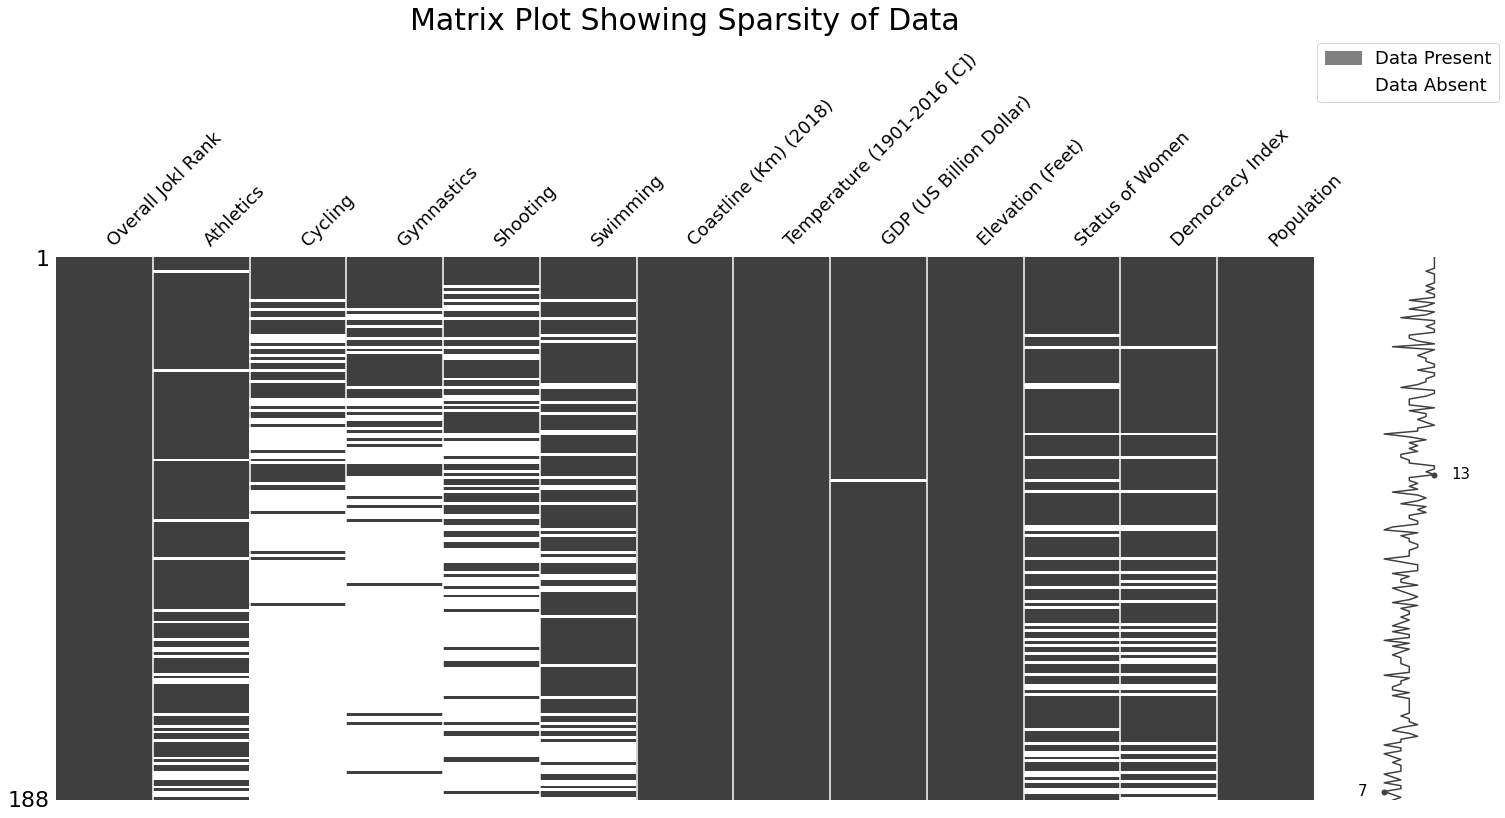

In [21]:
msno.matrix(SportData, fontsize=18)
gray_patch = mpatches.Patch(color='gray', label='Data Present')
white_patch = mpatches.Patch(color='white', label='Data Absent')
plt.legend(fontsize=18, bbox_to_anchor=(1.15, 1.4), borderaxespad=0.2, handles=[gray_patch, white_patch])
plt.title('Matrix Plot Showing Sparsity of Data', fontsize=30)
mpl.rcParams["axes.titlepad"]=20

plt.show()

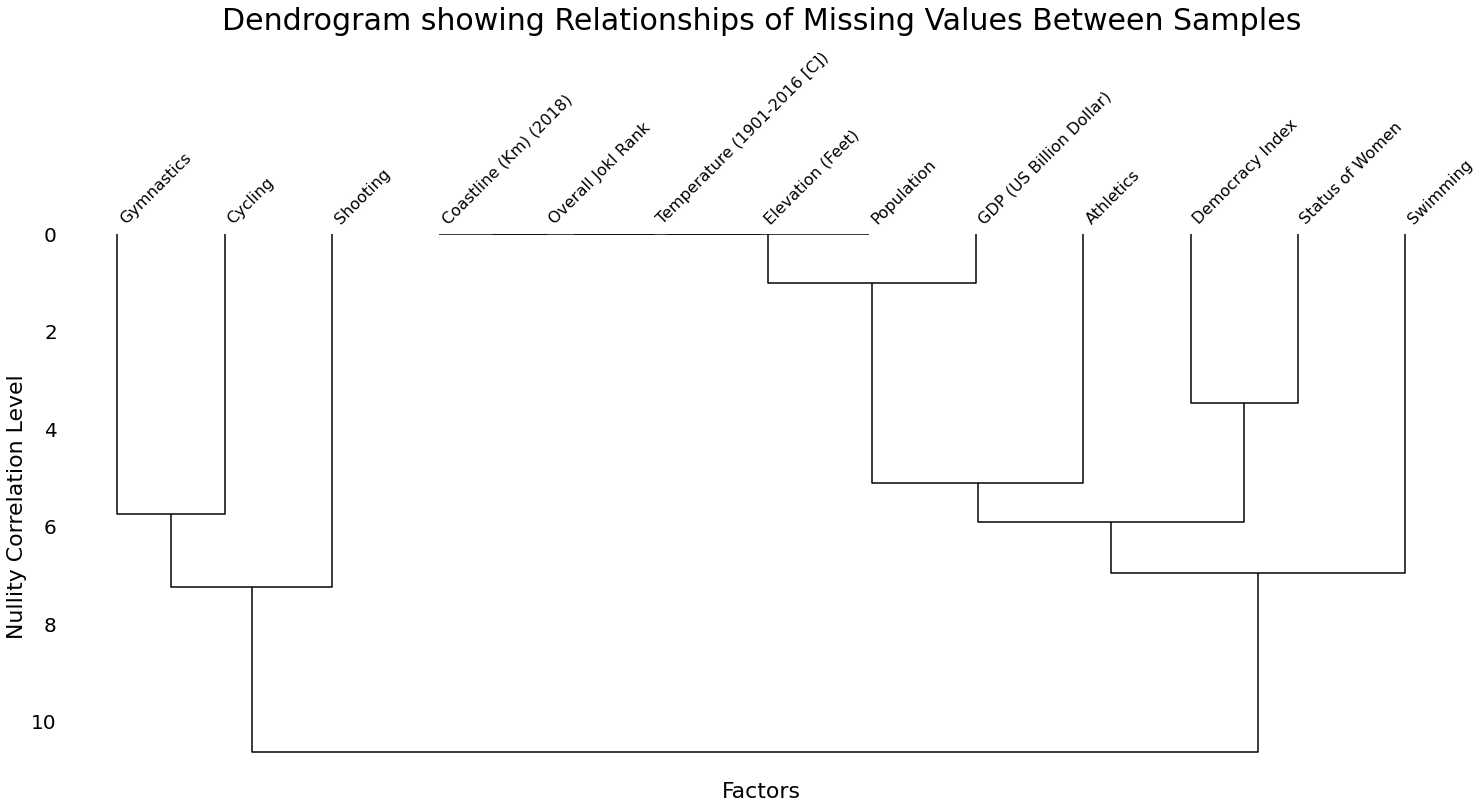

In [22]:
msno.dendrogram(SportData)
plt.title('Dendrogram showing Relationships of Missing Values Between Samples', fontsize=30)
mpl.rcParams["axes.titlepad"]=20
plt.ylabel('Nullity Correlation Level', fontsize=22)
plt.xlabel('Factors', fontsize=22)
plt.show()